In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
df=pd.read_csv('linear regression1.csv')

In [4]:
df.head(7)

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [5]:
df.shape

(7, 2)

In [6]:
df.corr()

,Weight,Price
Weight,1.000000,0.306795
Price,0.306795,1.000000


Text(0.5, 1.0, 'Price According to Weight')

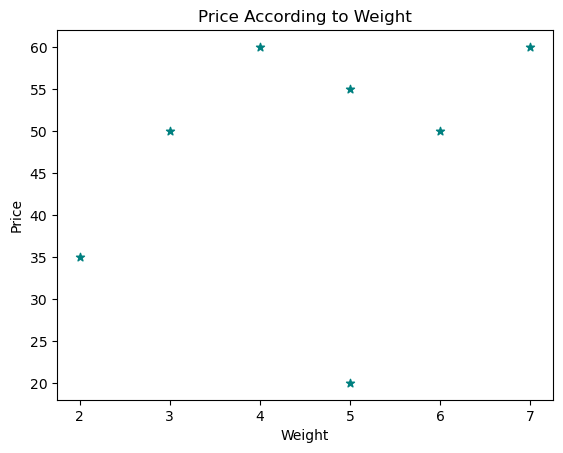

In [7]:
plt.scatter (df['Weight'] , df['Price'],color='teal',marker='*')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Price According to Weight')

In [8]:
df.describe()

,Weight,Price
count,7.000000,7.000000
mean,4.571429,47.142857
std,1.718249,14.679107
min,2.000000,20.000000
25%,3.500000,42.500000
50%,5.000000,50.000000
75%,5.500000,57.500000
max,7.000000,60.000000


In [9]:
x=df['Weight']
y=df['Price']


In [10]:
mean_x=np.mean(x)
mean_y=np.mean(y)

In [11]:
mean_x

4.571428571428571

In [12]:
mean_y

47.142857142857146

In [13]:
dev_x= x- mean_x
dev_y= y- mean_y


In [14]:

dev_x


0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [15]:

dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [16]:
coefficient_m =np.sum(dev_x *dev_y)/np.sum(dev_x **2)
coefficient_m

2.620967741935484

In [17]:
intercept=mean_y-(coefficient_m*mean_x)
intercept

35.16129032258065

In [18]:
predicted_price=(coefficient_m *2)+intercept
predicted_price

40.403225806451616

In [19]:
df.head(1)

,Weight,Price
0,2,35


In [20]:
predicted_price=(coefficient_m *4)+intercept
predicted_price

45.645161290322584

In [21]:
predicted_price=(coefficient_m *x)+intercept
predicted_price

0    40.403226
1    45.645161
2    48.266129
3    43.024194
4    50.887097
5    48.266129
6    53.508065
Name: Weight, dtype: float64

In [22]:
df['predicted_price']=predicted_price
z = df['predicted_price']
df

,Weight,Price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [23]:
residual =y-z
residual

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [24]:

n=7
MAE = 1/n * np.sum(np.absolute(residual))
MAE

9.873271889400918

In [25]:
MSE = 1/n * np.sum(residual**2)
MSE

167.30990783410135

In [26]:
import math
Rmse = math.sqrt(MSE)
Rmse


12.934833119685052

In [27]:
from sklearn.linear_model import LinearRegression 

In [28]:
reg=LinearRegression()

In [29]:
reg.fit(df[['Weight']],df[['Price']])

LinearRegression()

In [30]:
reg.coef_

array([[2.62096774]])

In [31]:
coefficient_m

2.620967741935484

In [32]:
reg.intercept_

array([35.16129032])

In [33]:
reg.predict([[2]])

C:\Users\farza\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[40.40322581]])

In [34]:
reg.predict([[6]])

C:\Users\farza\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[50.88709677]])

In [35]:
predicted_price = reg.predict(df[['Weight']])
predicted_price

array([[40.40322581],
       [45.64516129],
       [48.26612903],
       [43.02419355],
       [50.88709677],
       [48.26612903],
       [53.50806452]])

In [36]:
df['predicted_price']= reg.predict(df[['Weight']])
df.head(7)

,Weight,Price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


Text(0.5, 1.0, 'y=mx+c+epsilon/Residuals visualization graph')

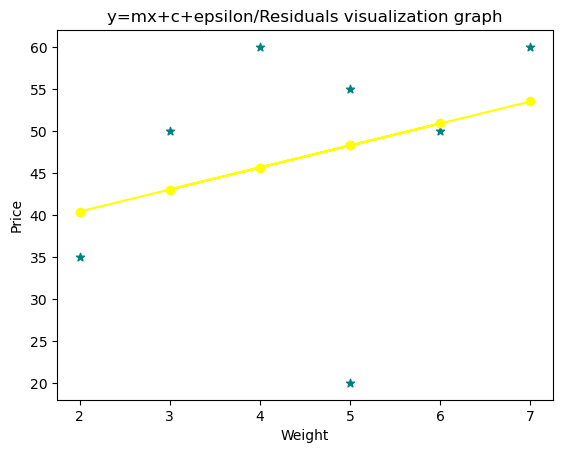

In [37]:
plt.plot(df[['Weight']], df[['predicted_price']], marker = 'o', color = 'yellow')
plt.scatter(df['Weight'], df['Price'], marker = '*', color = 'teal')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('y=mx+c+epsilon/Residuals visualization graph')

Text(0.5, 1.0, 'y=mx+c+epsilon/Residuals visualization graph')

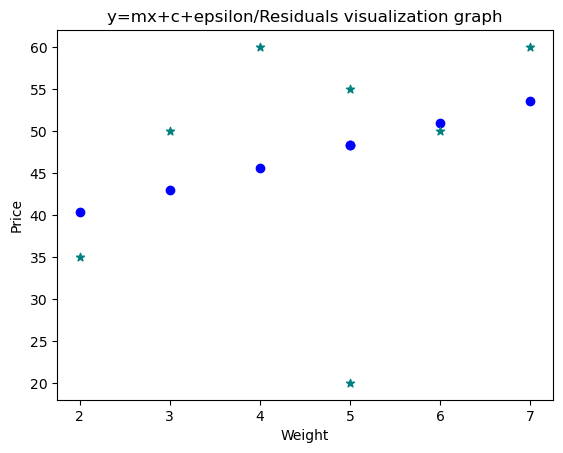

In [38]:
plt.scatter(df[['Weight']], df[['predicted_price']], marker = 'o', color = 'blue')
plt.scatter(df['Weight'], df['Price'], marker = '*', color = 'teal')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('y=mx+c+epsilon/Residuals visualization graph')

In [39]:

z=df['predicted_price']
residual = y-z

residual

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [40]:
df['residual'] = df['Price'] - df['predicted_price']
df.head(7)


,Weight,Price,predicted_price,residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [42]:
mae = mean_absolute_error(df['Price'], df['predicted_price'])
mae

9.87327188940092

In [43]:
mse = mean_squared_error(df['Price'], df['predicted_price'])
mse

167.30990783410135

In [44]:
import math
rmse = math.sqrt(mse)
rmse

12.934833119685052